In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# We will use 'smf' for the mixed-effects model formula
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import seaborn as sns


preprocessing

In [44]:
# --- 1. Load and Clean Data ---
data_df = pd.read_excel('../data/qqs_plant_roots_data.xlsx', header=1)
df = data_df.copy()

# **FIX: Strip whitespace from 'Name' column**
# This cleans up "EV " to "EV" before any filtering
if 'Name' in df.columns:
    df['Name'] = df['Name'].astype(str).str.strip()

# Find indices of the 'note' rows which separate the replications
note_indices = df[df['Name'].astype(str).str.contains('Note:', na=False)].index

# Assign replication numbers based on the note row indices
if len(note_indices) > 0:
    df.loc[0:note_indices[0], 'Replication'] = 1
if len(note_indices) > 1:
    df.loc[note_indices[0]:note_indices[1], 'Replication'] = 2
if len(note_indices) > 2:
    df.loc[note_indices[1]:note_indices[2], 'Replication'] = 3
elif len(note_indices) == 2: # handle case with only 2 note rows
    df.loc[note_indices[1]:, 'Replication'] = 3

# Drop rows that are not data (e.g., all-NaN rows, note rows)
df.dropna(subset=['Name'], inplace=True)
df = df[~df['Name'].str.contains('Note:', na=False)]

# Rename 'Name' for clarity
df.rename(columns={'Name': 'Transgenic_Line'}, inplace=True)

# --- 2. Create Pot-Level Outcome Variables ---
print("--- Creating Pot-Level Data ---")

# Define the *exact* lines we want to keep
valid_lines = ['EV', 'WT', 'QQS-3', 'QQS-5', 'QQS-7', 'QQS-10']

# Apply this specific filter (will now work correctly)
df = df[df['Transgenic_Line'].isin(valid_lines)].copy()

# **FIX: Reset the index to create the 'Pot_ID' column**
df = df.reset_index().rename(columns={'index': 'Pot_ID'})

# Find all columns that contain individual root weights
value_vars = ['Individule Root Weight (g)'] + [col for col in df.columns if 'Unnamed:' in str(col)]

# Calculate Total_Weight per pot (row)
df['Total_Weight'] = df[value_vars].sum(axis=1)

# Calculate Number_of_Roots per pot (row)
df['Number_of_Roots'] = df[value_vars].count(axis=1)

# Create our new "pot-level" dataframe
pot_df = df[['Pot_ID', 'Transgenic_Line', 'Replication', 'Total_Weight', 'Number_of_Roots']].copy()

# Set correct data types
pot_df['Transgenic_Line'] = pot_df['Transgenic_Line'].astype('category')
pot_df['Replication'] = pot_df['Replication'].astype('category')

print("Cleaned pot-level dataframe created:")
print(f"\nTotal pots in analysis: {len(pot_df)}")
print("\nGroups found:")
print(pot_df['Transgenic_Line'].value_counts())

--- Creating Pot-Level Data ---
Cleaned pot-level dataframe created:

Total pots in analysis: 20

Groups found:
Transgenic_Line
QQS-10    5
EV        3
QQS-3     3
QQS-5     3
QQS-7     3
WT        3
Name: count, dtype: int64


In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# We will use 'smf' for the mixed-effects model formula
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import seaborn as sns


preprocessing

In [46]:
# --- 1. Load and Clean Data ---
data_df = pd.read_excel('../data/qqs_plant_roots_data.xlsx', header=1)
df = data_df.copy()

# **FIX: Strip whitespace from 'Name' column**
# This cleans up "EV " to "EV" before any filtering
if 'Name' in df.columns:
    df['Name'] = df['Name'].astype(str).str.strip()

# Find indices of the 'note' rows which separate the replications
note_indices = df[df['Name'].astype(str).str.contains('Note:', na=False)].index

# Assign replication numbers based on the note row indices
if len(note_indices) > 0:
    df.loc[0:note_indices[0], 'Replication'] = 1
if len(note_indices) > 1:
    df.loc[note_indices[0]:note_indices[1], 'Replication'] = 2
if len(note_indices) > 2:
    df.loc[note_indices[1]:note_indices[2], 'Replication'] = 3
elif len(note_indices) == 2: # handle case with only 2 note rows
    df.loc[note_indices[1]:, 'Replication'] = 3

# Drop rows that are not data (e.g., all-NaN rows, note rows)
df.dropna(subset=['Name'], inplace=True)
df = df[~df['Name'].str.contains('Note:', na=False)]

# Rename 'Name' for clarity
df.rename(columns={'Name': 'Transgenic_Line'}, inplace=True)

# --- 2. Create Pot-Level Outcome Variables ---
print("--- Creating Pot-Level Data ---")

# Define the *exact* lines we want to keep
valid_lines = ['EV', 'WT', 'QQS-3', 'QQS-5', 'QQS-7', 'QQS-10']

# Apply this specific filter (will now work correctly)
df = df[df['Transgenic_Line'].isin(valid_lines)].copy()

df = df.reset_index().rename(columns={'index': 'Pot_ID'})

# Find all columns that contain individual root weights
value_vars = ['Individule Root Weight (g)'] + [col for col in df.columns if 'Unnamed:' in str(col)]

# Calculate Total_Weight per pot (row)
df['Total_Weight'] = df[value_vars].sum(axis=1)

# Calculate Number_of_Roots per pot (row)
df['Number_of_Roots'] = df[value_vars].count(axis=1)

# Create our new "pot-level" dataframe
pot_df = df[['Pot_ID', 'Transgenic_Line', 'Replication', 'Total_Weight', 'Number_of_Roots']].copy()

# Set correct data types
pot_df['Transgenic_Line'] = pot_df['Transgenic_Line'].astype('category')
pot_df['Replication'] = pot_df['Replication'].astype('category')

print("Cleaned pot-level dataframe created:")
print(f"\nTotal pots in analysis: {len(pot_df)}")
print("\nGroups found:")
print(pot_df['Transgenic_Line'].value_counts())

--- Creating Pot-Level Data ---
Cleaned pot-level dataframe created:

Total pots in analysis: 20

Groups found:
Transgenic_Line
QQS-10    5
EV        3
QQS-3     3
QQS-5     3
QQS-7     3
WT        3
Name: count, dtype: int64


stats

In [59]:
# --- 3. ANOVA for Total_Weight (Main Effects) ---
print("\n--- ANOVA Results for Total_Weight ---")

# We use this "main effects" formula because your data is unbalanced
# (different pot numbers per line). It's more robust.
formula_total_w = "Total_Weight ~ C(Transgenic_Line) + C(Replication)"

model_total_w = smf.ols(formula_total_w, data=pot_df).fit()
anova_total_w = sm.stats.anova_lm(model_total_w, typ=2)
print(anova_total_w)


# --- 4. ANOVA for Number_of_Roots (Main Effects) ---
print("\n--- ANOVA Results for Number_of_Roots ---")

formula_num_r = "Number_of_Roots ~ C(Transgenic_Line) + C(Replication)"

model_num_r = smf.ols(formula_num_r, data=pot_df).fit()
anova_num_r = sm.stats.anova_lm(model_num_r, typ=2)
print(anova_num_r)


# --- 5. Post-Hoc (Tukey's HSD) Testing ---
from statsmodels.stats.multicomp import MultiComparison

print("\n--- Post-Hoc (Tukey's HSD) for Total_Weight ---")
# (Run this to see *which* lines are different, 
# especially if the ANOVA p-value for C(Transgenic_Line) is < 0.05)
mc_total_w = MultiComparison(pot_df['Total_Weight'], pot_df['Transgenic_Line'])
tukey_result_total_w = mc_total_w.tukeyhsd(alpha=0.05)
print(tukey_result_total_w)

print("\n--- Post-Hoc (Tukey's HSD) for Number_of_Roots ---")
mc_num_r = MultiComparison(pot_df['Number_of_Roots'], pot_df['Transgenic_Line'])
tukey_result_num_r = mc_num_r.tukeyhsd(alpha=0.05)
print(tukey_result_num_r)

# # --- 6. Follow-up Tests: Effect of Replication *within* each Line ---
# print(f"\n--- Running 12 Follow-up ANOVAs ---")
# print("Applying Bonferroni Correction.")
# print("Only p-values < 0.00417 are significant.")

# # Get the list of lines to test from the dataframe
# unique_lines = pot_df['Transgenic_Line'].unique()

# # Loop through each line one-by-one
# for line in unique_lines:
#     print(f"\n=============================================")
#     print(f"     ANALYSIS FOR LINE: {line}")
#     print(f"=============================================")
    
#     # Filter the dataframe to *only* this line
#     line_df = pot_df[pot_df['Transgenic_Line'] == line]

#     # --- Test 1: Total_Weight ---
#     print("\n  Test 1: Total_Weight ~ C(Replication)")
#     try:
#         formula_w = 'Total_Weight ~ C(Replication)'
#         model_w = smf.ols(formula_w, data=line_df).fit()
#         anova_w = sm.stats.anova_lm(model_w, typ=2)
#         print(anova_w)
#     except Exception as e:
#         print(f"  Could not run ANOVA for Total_Weight. Error: {e}")

#     # --- Test 2: Number_of_Roots ---
#     print("\n  Test 2: Number_of_Roots ~ C(Replication)")
#     try:
#         formula_r = 'Number_of_Roots ~ C(Replication)'
#         model_r = smf.ols(formula_r, data=line_df).fit()
#         anova_r = sm.stats.anova_lm(model_r, typ=2)
#         print(anova_r)
#     except Exception as e:
#         print(f"  Could not run ANOVA for Number_of_Roots. Error: {e}")


--- ANOVA Results for Total_Weight ---
                           sum_sq    df          F    PR(>F)
C(Transgenic_Line)  143988.490289   5.0   1.744046  0.199188
C(Replication)      544882.765650   2.0  16.499592  0.000360
Residual            198144.090337  12.0        NaN       NaN

--- ANOVA Results for Number_of_Roots ---
                       sum_sq    df         F    PR(>F)
C(Transgenic_Line)  90.804916   5.0  4.126392  0.020583
C(Replication)       2.385868   2.0  0.271049  0.767125
Residual            52.814132  12.0       NaN       NaN

--- Post-Hoc (Tukey's HSD) for Total_Weight ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    EV QQS-10   213.884 0.7952  -337.944  765.712  False
    EV  QQS-3   55.9967 0.9996 -560.9658 672.9591  False
    EV  QQS-5    4.9167    1.0 -612.0458 621.8791  False
    EV  QQS-7  208.3833 0.8703 -408.5791 825.3458  False
 

plotting


Generating new pot-level plots...
Plot saved as 'plant_pot_level_comparison.png'


/var/folders/f0/1x9ky0yd3nj4p68sphk83ngr0000gn/T/ipykernel_49152/98732944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='Transgenic_Line', y='Total_Weight', data=pot_df,
/var/folders/f0/1x9ky0yd3nj4p68sphk83ngr0000gn/T/ipykernel_49152/98732944.py:8: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(ax=axes[0], x='Transgenic_Line', y='Total_Weight', hue='Replication',
/var/folders/f0/1x9ky0yd3nj4p68sphk83ngr0000gn/T/ipykernel_49152/98732944.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='Transgenic_Line', y='Number_of_Roots', data=pot_df,
/var/folders/f0/1x9ky0yd3

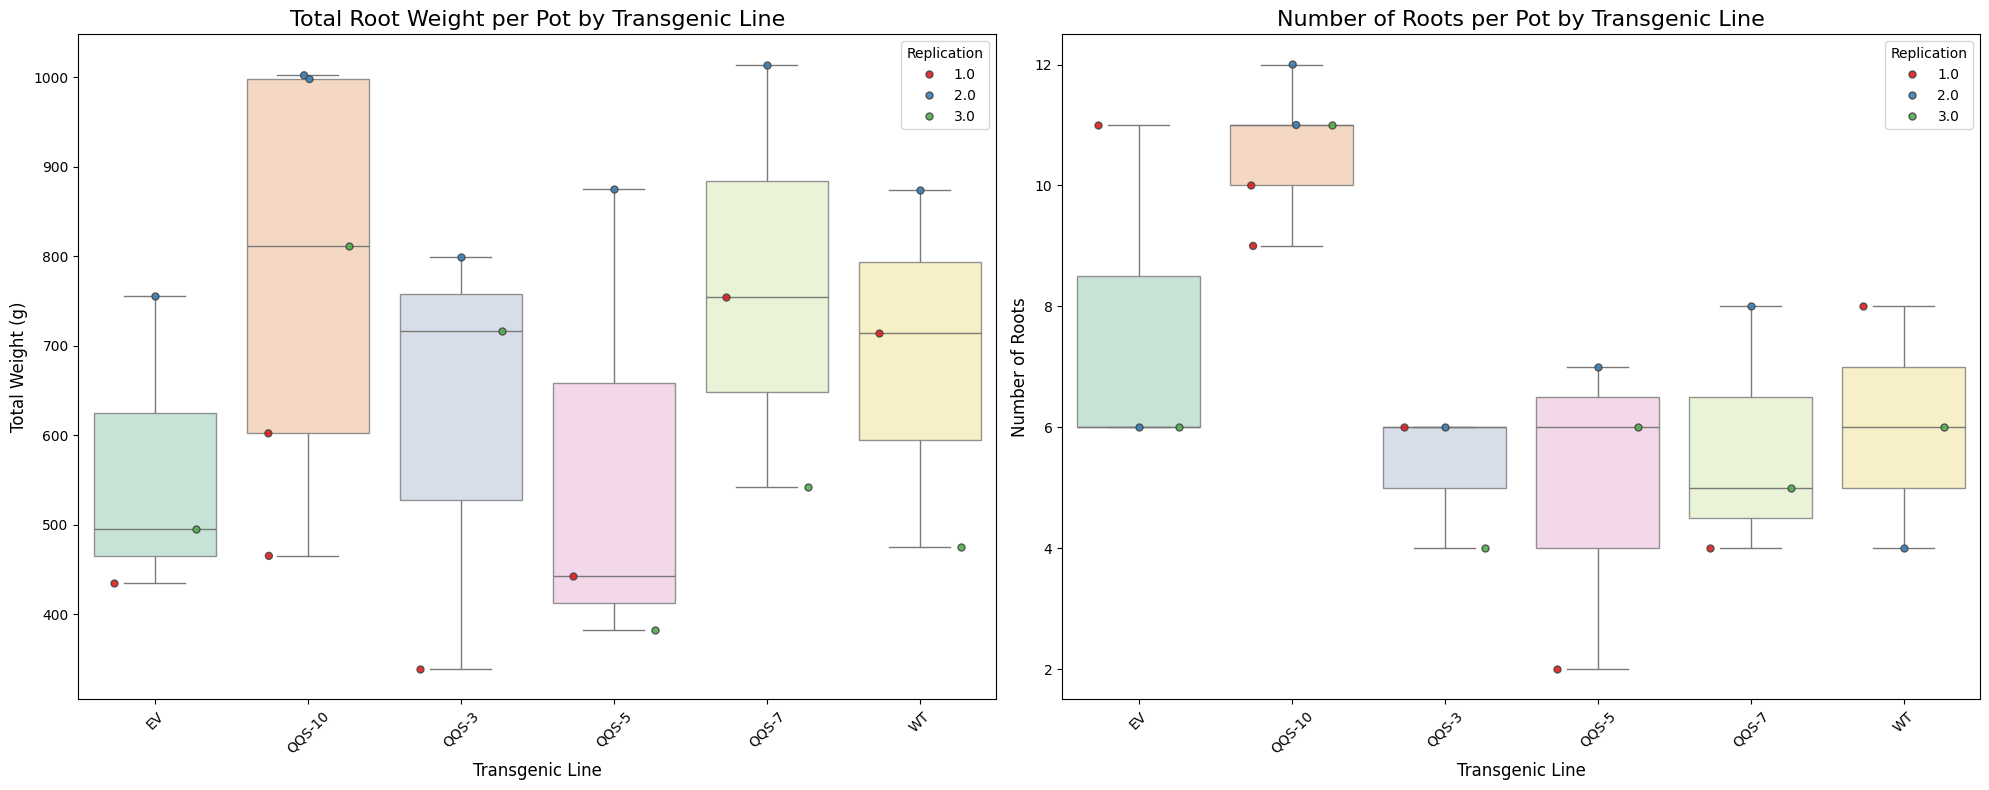

In [51]:
# --- 5. Generate and Save New Plots ---
print("\nGenerating new pot-level plots...")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Plot 1: Total Weight ---
sns.boxplot(ax=axes[0], x='Transgenic_Line', y='Total_Weight', data=pot_df,
            palette='Pastel2', boxprops=dict(alpha=.8))
sns.stripplot(ax=axes[0], x='Transgenic_Line', y='Total_Weight', hue='Replication',
              data=pot_df, jitter=True, dodge=True, palette='Set1',
              linewidth=1, edgecolor='gray', alpha=0.9)
axes[0].set_title('Total Root Weight per Pot by Transgenic Line', fontsize=16)
axes[0].set_ylabel('Total Weight (g)', fontsize=12)
axes[0].set_xlabel('Transgenic Line', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Replication')

# --- Plot 2: Number of Roots ---
sns.boxplot(ax=axes[1], x='Transgenic_Line', y='Number_of_Roots', data=pot_df,
            palette='Pastel2', boxprops=dict(alpha=.8))
sns.stripplot(ax=axes[1], x='Transgenic_Line', y='Number_of_Roots', hue='Replication',
              data=pot_df, jitter=True, dodge=True, palette='Set1',
              linewidth=1, edgecolor='gray', alpha=0.9)
axes[1].set_title('Number of Roots per Pot by Transgenic Line', fontsize=16)
axes[1].set_ylabel('Number of Roots', fontsize=12)
axes[1].set_xlabel('Transgenic Line', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Replication')

plt.tight_layout()

# Save the figure
plt.savefig('plant_pot_level_comparison.png')
print("Plot saved as 'plant_pot_level_comparison.png'")